In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
os.chdir('C:\\Users\Ashok kumar\Desktop\chanu\DSML_Course\DataSet')

In [4]:
#Loading dataset
df = pd.read_csv('walmart_data.csv')

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [6]:
df.shape

(550068, 10)

In [7]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [8]:
#unique columns in each column
df.nunique().sort_values()

Gender                            2
Marital_Status                    2
City_Category                     3
Stay_In_Current_City_Years        5
Age                               7
Product_Category                 20
Occupation                       21
Product_ID                     3631
User_ID                        5891
Purchase                      18105
dtype: int64

In [9]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

No Null values in dataset

In [10]:
df.Gender.value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [11]:
df.Marital_Status=df.Marital_Status.astype('category')

In [12]:
df.dtypes

User_ID                          int64
Product_ID                      object
Gender                          object
Age                             object
Occupation                       int64
City_Category                   object
Stay_In_Current_City_Years      object
Marital_Status                category
Product_Category                 int64
Purchase                         int64
dtype: object

In [13]:
df.Marital_Status.value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

<AxesSubplot:xlabel='Marital_Status', ylabel='Count'>

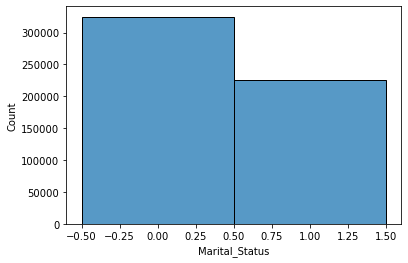

In [14]:
sns.histplot(x=df.Marital_Status)

In [15]:
df.groupby([df.Gender,df.Marital_Status]).Marital_Status.count().sort_values(ascending=False)

Gender  Marital_Status
M       0                 245910
        1                 168349
F       0                  78821
        1                  56988
Name: Marital_Status, dtype: int64

<AxesSubplot:xlabel='Marital_Status', ylabel='Count'>

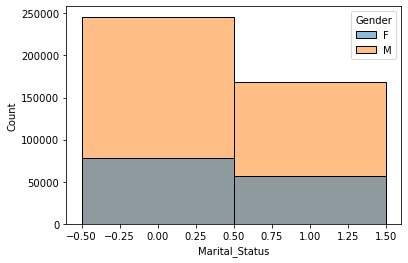

In [24]:
sns.histplot(x=df.Marital_Status,hue=df.Gender)

Male customers are more compared to female customers among married and single

<AxesSubplot:xlabel='Count', ylabel='Gender'>

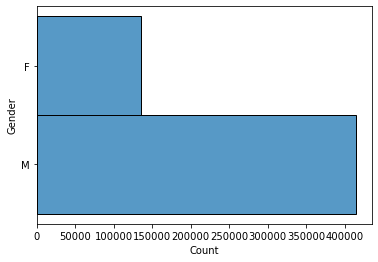

In [44]:
# plt.figure(figsize=(13,7))
sns.histplot(y=df.Gender)

In [35]:
df.loc[df.Gender == 'F'].Age.value_counts()

26-35    50752
36-45    27170
18-25    24628
46-50    13199
51-55     9894
0-17      5083
55+       5083
Name: Age, dtype: int64

In [37]:
df.loc[df.Gender == 'M'].Age.value_counts()

26-35    168835
36-45     82843
18-25     75032
46-50     32502
51-55     28607
55+       16421
0-17      10019
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

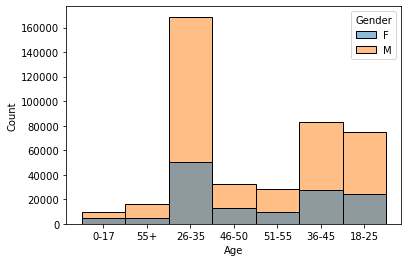

In [42]:
sns.histplot(x=df.Age,hue=df.Gender)

Age Group with 26-35 buys more during the blackfriday sale

In [47]:
d1=df.loc[df.Age== '26-35']

<AxesSubplot:xlabel='Gender', ylabel='Count'>

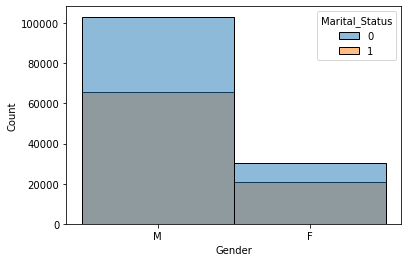

In [48]:
sns.histplot(x=d1.Gender,hue=d1.Marital_Status)

In the age group of 26-35 unmarried people are buying more products

##### 1 - Unmarried   0 - Married

In [59]:
df.Occupation.value_counts().sort_values(ascending=False)

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='Count'>

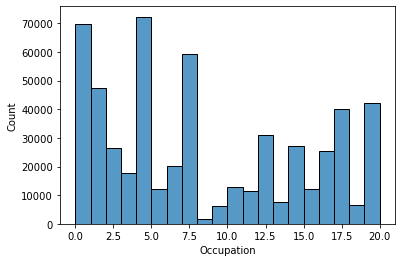

In [57]:
sns.histplot(df.Occupation,bins=np.arange(21))

In [60]:
#we can see that 4,0,7 occupational customers are more contributors than other occupational customers

In [63]:
df.City_Category.value_counts().sort_values(ascending=False)

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

<AxesSubplot:xlabel='City_Category', ylabel='Count'>

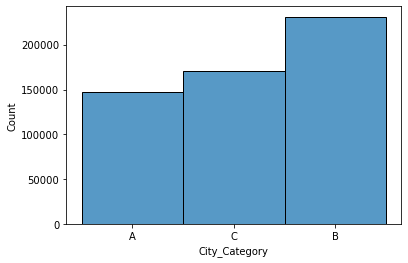

In [64]:
sns.histplot(x=df.City_Category)

In [69]:
df.Stay_In_Current_City_Years.value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Count'>

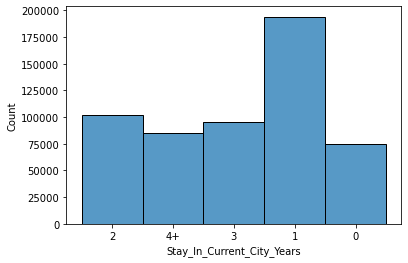

In [70]:
sns.histplot(df.Stay_In_Current_City_Years)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Count'>

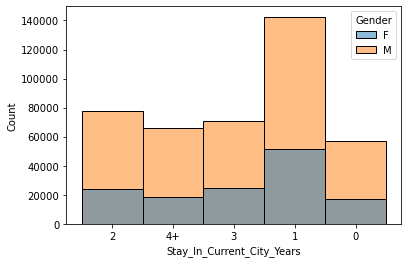

In [72]:
sns.histplot(x=df.Stay_In_Current_City_Years,hue=df.Gender)

In [74]:
#from this we can say that people who comes to the city in first year buys more things to their house as compared to others 
#to setup their house

In [95]:
d1=pd.DataFrame(df.groupby([df.City_Category,df.Stay_In_Current_City_Years]).Occupation.count()).reset_index()
d1.rename(columns={'Occupation':'Count'},inplace=True)
d1.sort_values(by=['Count'],ascending=False)

,City_Category,Stay_In_Current_City_Years,Count
6,B,1,83413
11,C,1,61103
1,A,1,49305
8,B,3,42691
7,B,2,41772
9,B,4+,34610
12,C,2,32952
5,B,0,28687
14,C,4+,27797
13,C,3,27790


<AxesSubplot:xlabel='City_Category', ylabel='Count'>

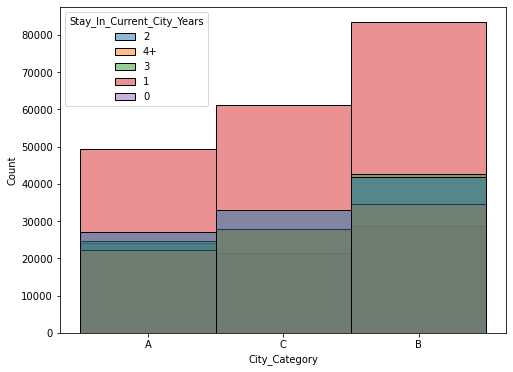

In [76]:
plt.figure(figsize=(8,6))
sns.histplot(x=df.City_Category,hue=df.Stay_In_Current_City_Years)

In [96]:
#we can observe that B is the most popular city cateogry and customers who lived for 1 year are the most contributors in 
#all 3 city cateogries.

In [97]:
df_copy = df.copy()

In [102]:
df_copy['Gender'].replace(['M', 'F'], [1, 0], inplace=True)
df_copy['City_Category'].replace(['A', 'B', 'C'],[2,1,0],inplace=True)
df_copy.Marital_Status=df_copy.Marital_Status.astype('category')
df_copy['Stay_In_Current_City_Years'].replace(['2', '4+', '3', '1', '0'],[2, 4, 3, 1, 0],inplace=True)

<AxesSubplot:>

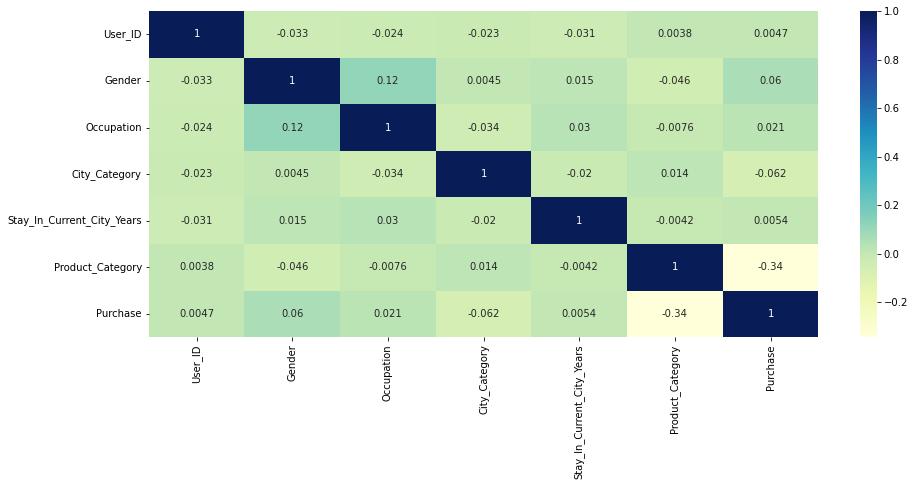

In [104]:
plt.figure(figsize=(15,6))
sns.heatmap(df_copy.corr(),cmap="YlGnBu",annot=True)

In [105]:
#we dont see much correlation between the features

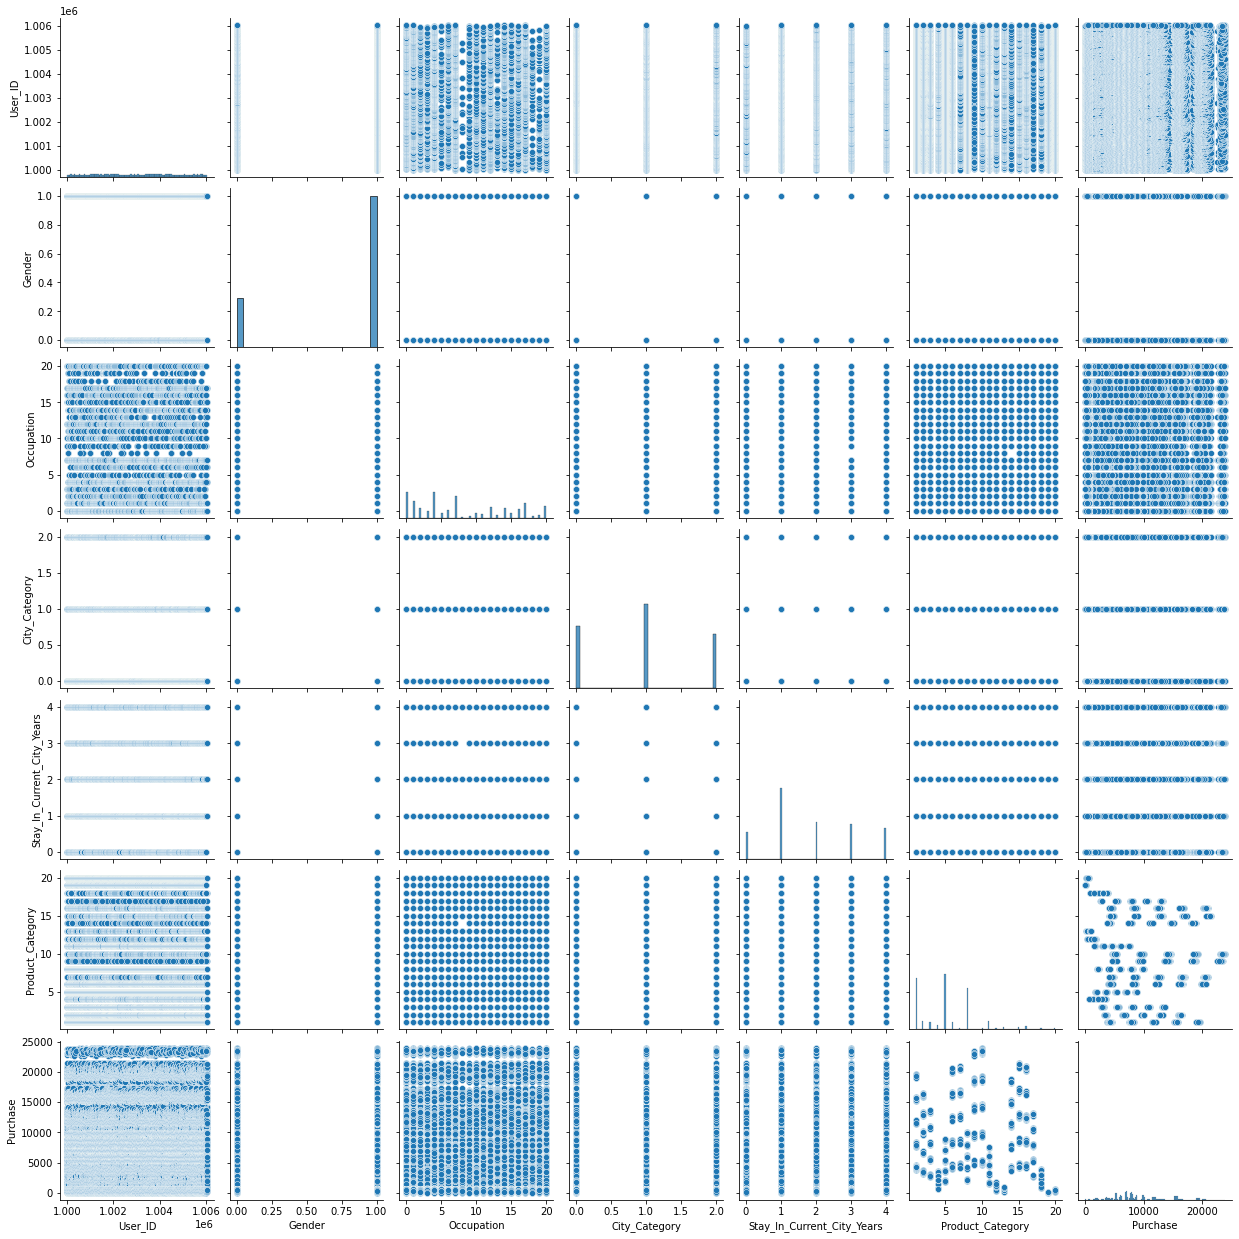

In [106]:
sns.pairplot(df_copy)

### Outliers

<AxesSubplot:xlabel='Purchase'>

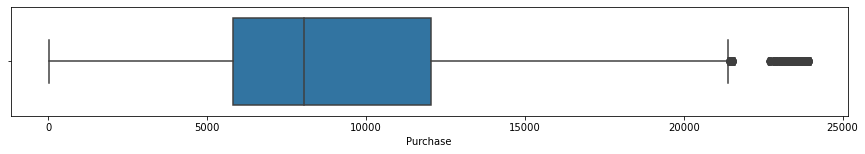

In [111]:
plt.figure(figsize=(15,2))
sns.boxplot(x=df.Purchase)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

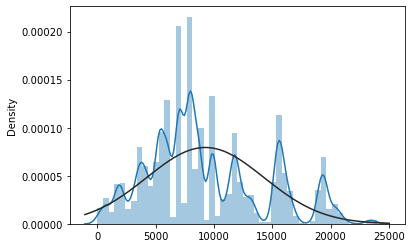

In [120]:
sns.distplot(x=df.Purchase,fit=stats.norm)

In [163]:
df.loc[df['Gender'] == 'M']['Purchase'].sum()/df.loc[df['Gender'] == 'M'].size

943.7526040472264

In [164]:
df.loc[df['Gender'] == 'F']['Purchase'].sum()/df.loc[df['Gender'] == 'F'].size

873.4565765155476

In [165]:
#Male Spends more than female

In [121]:
df['Purchase'].mean()

9263.968712959126

In [122]:
#overall mean is 9263.968712959126

In [125]:
df.loc[df['Gender'] == 'M']['Purchase'].mean()

9437.526040472265

In [126]:
df.loc[df['Gender'] == 'F']['Purchase'].mean()

8734.565765155476

In [130]:
#Male purchases more than female 

In [134]:
df.loc[(df['Marital_Status'] == 0) & (df['Gender']=='F')]['Purchase'].mean()

8679.845815201532

In [135]:
df.loc[(df['Marital_Status'] == 0) & (df['Gender']=='M')]['Purchase'].mean()

9453.75674027083

In [136]:
df.loc[(df['Marital_Status'] == 1) & (df['Gender']=='F')]['Purchase'].mean()

8810.249789429354

In [137]:
df.loc[(df['Marital_Status'] == 1) & (df['Gender']=='M')]['Purchase'].mean()

9413.81760509418

In [138]:
#From above we can say that Male customers spend almost same even after marriage.
# Unmarried Females spends more compared to married female's

In [139]:
df.loc[(df['Marital_Status'] == 0)]['Purchase'].mean()

9265.907618921507

In [140]:
df.loc[(df['Marital_Status'] == 1)]['Purchase'].mean()

9261.174574082374

In [141]:
#From Above we can say that married and unmarried customers spend same amount.

In [160]:
lis = [1,2,3,'4+']
means=[]
for i in range(len(lis)):
    x=df.loc[(df['Stay_In_Current_City_Years'] == str(lis[i]))]['Purchase'].mean()
    means.append(x)
stay_in_country_means = {stay:mean for stay,mean in zip(lis,means)}
stay_in_country_means

{1: 9250.145923300364,
 2: 9320.429810090536,
 3: 9286.904119221284,
 '4+': 9275.59887165687}

In [161]:
lis = [1,2,3,'4+']
means=[]
for i in range(len(lis)):
    x=df.loc[(df['Stay_In_Current_City_Years'] == str(lis[i])) & (df['Marital_Status']== 0)]['Purchase'].mean()
    means.append(x)
stay_in_country_means = {stay:mean for stay,mean in zip(lis,means)}
stay_in_country_means

{1: 9241.859769097347,
 2: 9307.26052631579,
 3: 9362.867434558606,
 '4+': 9217.201657458563}

In [162]:
lis = [1,2,3,'4+']
means=[]
for i in range(len(lis)):
    x=df.loc[(df['Stay_In_Current_City_Years'] == str(lis[i])) & (df['Marital_Status']== 1)]['Purchase'].mean()
    means.append(x)
stay_in_country_means = {stay:mean for stay,mean in zip(lis,means)}
stay_in_country_means

{1: 9261.180439097745,
 2: 9339.940810955699,
 3: 9170.557415378076,
 '4+': 9362.527462844388}

In [177]:
age_bin = ['0-17', '18-25', '26-35', '36-45','46-50', '51-55',  '55+']
means=[]
for i in range(len(age_bin)):
    x=df.loc[(df['Age'] == age_bin[i])]['Purchase'].mean()
    means.append(x)
Age_mean = {Age:mean for Age,mean in zip(age_bin,means)}
Age_mean

{'0-17': 8933.464640444974,
 '18-25': 9169.663606261289,
 '26-35': 9252.690632869888,
 '36-45': 9331.350694917874,
 '46-50': 9208.625697468327,
 '51-55': 9534.808030960236,
 '55+': 9336.280459449405}

In [179]:
#customers with age 51-55 purchases more compared to other age groups.

### CLT

### Gender

In [229]:
z_interval = stats.norm.interval(alpha = [0.90,0.95,0.99])
z_interval

(array([-1.64485363, -1.95996398, -2.5758293 ]),
 array([1.64485363, 1.95996398, 2.5758293 ]))

In [231]:
ci_90 = 1.64485363
ci_95 = 1.95996398
ci_99 = 2.5758293 

In [381]:
def caluclate_ci(samp_mean,sigma,n):
    ci_90 = 1.64485363
    ci_95 = 1.95996398
    ci_99 = 2.5758293
    ci = [1.64485363,1.95996398,2.5758293]
    per = ['90%','95%','99%']
    for i in range(len(ci)):
        ul = samp_mean + (ci[i] * (sigma/(n)**(1/2)))
        ll = samp_mean - (ci[i] * (sigma/(n)**(1/2)))
        print('We can be confident that {0} of customers will spend in range of {1},{2}'.format(per[i],ll,ul))

#### Sample Size 1000

#### Male CI

In [196]:
samples = 1000
repetetion = 1000
sample_mean_1 = []
for rep in range(repetetion):
    x = df.loc[df['Gender'] == 'M']['Purchase'].sample(samples).mean()
    sample_mean_1.append(x)
np.mean(sample_mean_1)

9431.573809

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

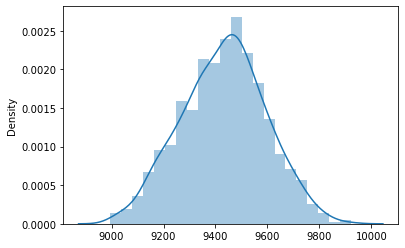

In [206]:
sns.distplot(sample_mean_1)

In [382]:
caluclate_ci(np.mean(sample_mean_1),np.std(sample_mean_1),1000)

We can be confident that 90% of customers will spend in range of 9423.133436309066,9440.014181690933
We can be confident that 95% of customers will spend in range of 9421.516484658014,9441.631133341985
We can be confident that 99% of customers will spend in range of 9418.356244297769,9444.79137370223


#### Female CI

In [198]:
samples = 1000
repetetion = 1000
sample_mean_2 = []
for rep in range(repetetion):
    x = df.loc[df['Gender'] == 'F']['Purchase'].sample(samples).mean()
    sample_mean_2.append(x)
np.mean(sample_mean_2)

8731.657868

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

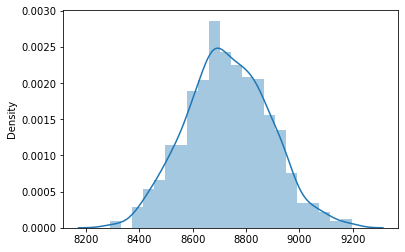

In [205]:
sns.distplot(sample_mean_2)

In [383]:
caluclate_ci(np.mean(sample_mean_2),np.std(sample_mean_2),1000)

We can be confident that 90% of customers will spend in range of 8723.59480947706,8739.720926522941
We can be confident that 95% of customers will spend in range of 8722.050141217895,8741.265594782106
We can be confident that 99% of customers will spend in range of 8719.031174650388,8744.284561349612


#### sample size 10000

#### Male CI

In [200]:
samples = 10000
repetetion = 1000
sample_mean_3 = []
for rep in range(repetetion):
    x = df.loc[df['Gender'] == 'M']['Purchase'].sample(samples).mean()
    sample_mean_3.append(x)
np.mean(sample_mean_3)

9436.2865602

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

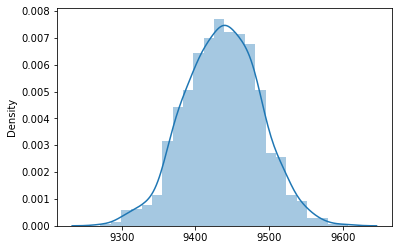

In [207]:
sns.distplot(sample_mean_3)

In [384]:
caluclate_ci(np.mean(sample_mean_3),np.std(sample_mean_3),10000)

We can be confident that 90% of customers will spend in range of 9435.452797701077,9437.120322698924
We can be confident that 95% of customers will spend in range of 9435.293070909547,9437.280049490453
We can be confident that 99% of customers will spend in range of 9434.980893948123,9437.592226451878


In [203]:
samples = 10000
repetetion = 1000
sample_mean_4 = []
for rep in range(repetetion):
    x = df.loc[df['Gender'] == 'F']['Purchase'].sample(samples).mean()
    sample_mean_4.append(x)
np.mean(sample_mean_4)

8738.1874266

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

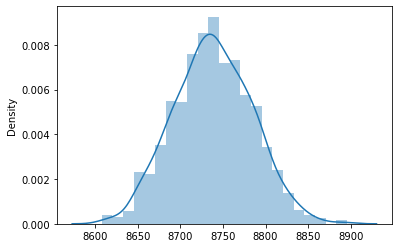

In [208]:
sns.distplot(sample_mean_4)

In [385]:
caluclate_ci(np.mean(sample_mean_4),np.std(sample_mean_4),10000)

We can be confident that 90% of customers will spend in range of 8737.430609837696,8738.944243362303
We can be confident that 95% of customers will spend in range of 8737.285623809454,8739.089229390545
We can be confident that 99% of customers will spend in range of 8737.002256834427,8739.372596365572


In [299]:
#Female Population mean
df.loc[df.Gender == 'F']['Purchase'].mean() 

8734.565765155476

In [300]:
#Male Population mean
df.loc[df.Gender == 'M']['Purchase'].mean()

9437.526040472265

#### Sample Size - 5000

#### Male CI

In [302]:
samples = 5000
repetetion = 1000
sample_mean_5 = []
for rep in range(repetetion):
    x = df.loc[df['Gender'] == 'M']['Purchase'].sample(samples).mean()
    sample_mean_5.append(x)
np.mean(sample_mean_5)

9439.4632282

In [386]:
caluclate_ci(np.mean(sample_mean_5),np.std(sample_mean_5),5000)

We can be confident that 90% of customers will spend in range of 9437.79751921965,9441.12893718035
We can be confident that 95% of customers will spend in range of 9437.478413537403,9441.448042862598
We can be confident that 99% of customers will spend in range of 9436.854739566967,9442.071716833034


#### Female CI

In [288]:
samples = 5000
repetetion = 1000
sample_mean_6 = []
for rep in range(repetetion):
    x = df.loc[df['Gender'] == 'F']['Purchase'].sample(samples).mean()
    sample_mean_6.append(x)
np.mean(sample_mean_6)

8733.637042

In [387]:
caluclate_ci(np.mean(sample_mean_6),np.std(sample_mean_6),5000)

We can be confident that 90% of customers will spend in range of 8732.127594702279,8735.146489297722
We can be confident that 95% of customers will spend in range of 8731.838424615884,8735.435659384117
We can be confident that 99% of customers will spend in range of 8731.273258070923,8736.000825929077


#### Comparing CI of Different Sample Sizes

#### Female

From above we can say that sample size of 5000 mean is equivalent to population mean compared to other sample size's

In [310]:
df.loc[df.Gender=='F']['Purchase'].size

135809

#### Male

From above we can see that sample mean changes with the sample size and population mean is equivalent to 10000 samples

In [308]:
df.loc[df.Gender=='M']['Purchase'].size

414259

Population size of male customers is 3 times larger than female customers

### Marital Status

#### 0 - Married 1 - Un-Married

In [313]:
df.loc[df['Marital_Status'] == 0]['Purchase'].size

324731

In [314]:
df.loc[df['Marital_Status'] == 1]['Purchase'].size

225337

In [315]:
df.loc[df['Marital_Status'] == 0]['Purchase'].mean()

9265.907618921507

In [316]:
df.loc[df['Marital_Status'] == 1]['Purchase'].mean()

9261.174574082374

In [322]:
# Spending mean amount of married and unmarried customers are almost equal

###### Married sample size 1000

In [327]:
samples = 1000
repetetion = 1000
sample_mean_7 = []
for rep in range(repetetion):
    x = df.loc[df['Marital_Status'] == 0]['Purchase'].sample(samples).mean()
    sample_mean_7.append(x)
np.mean(sample_mean_7)

9261.274398

In [388]:
caluclate_ci(np.mean(sample_mean_7),np.std(sample_mean_7),1000)

We can be confident that 90% of customers will spend in range of 9252.951964814969,9269.59683118503
We can be confident that 95% of customers will spend in range of 9251.357607246639,9271.19118875336
We can be confident that 99% of customers will spend in range of 9248.241525740543,9274.307270259456


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

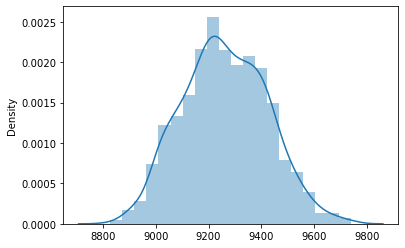

In [329]:
sns.distplot(sample_mean_7)

##### Un-Married sample size 1000

In [330]:
samples = 1000
repetetion = 1000
sample_mean_8 = []
for rep in range(repetetion):
    x = df.loc[df['Marital_Status'] == 1]['Purchase'].sample(samples).mean()
    sample_mean_8.append(x)
np.mean(sample_mean_8)

9269.046088

In [389]:
caluclate_ci(np.mean(sample_mean_8),np.std(sample_mean_8),1000)

We can be confident that 90% of customers will spend in range of 9260.910274914764,9277.181901085234
We can be confident that 95% of customers will spend in range of 9259.351668810205,9278.740507189794
We can be confident that 99% of customers will spend in range of 9256.305461513815,9281.786714486183


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

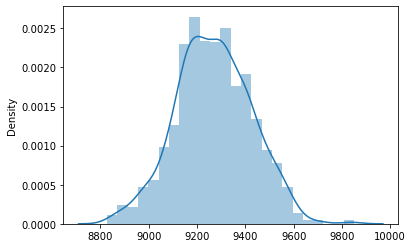

In [335]:
sns.distplot(sample_mean_8)

##### Married sample size 5000

In [333]:
samples = 5000
repetetion = 1000
sample_mean_9 = []
for rep in range(repetetion):
    x = df.loc[df['Marital_Status'] == 0]['Purchase'].sample(samples).mean()
    sample_mean_9.append(x)
np.mean(sample_mean_9)

9269.079396199999

In [390]:
caluclate_ci(np.mean(sample_mean_9),np.std(sample_mean_9),5000)

We can be confident that 90% of customers will spend in range of 9267.465432678506,9270.693359721492
We can be confident that 95% of customers will spend in range of 9267.15624005439,9271.002552345608
We can be confident that 99% of customers will spend in range of 9266.551940594241,9271.606851805756


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

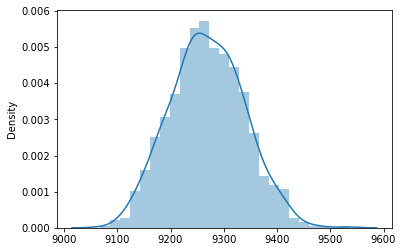

In [337]:
sns.distplot(sample_mean_9)

##### Un-Married sample size 5000

In [338]:
samples = 5000
repetetion = 1000
sample_mean_10 = []
for rep in range(repetetion):
    x = df.loc[df['Marital_Status'] == 1]['Purchase'].sample(samples).mean()
    sample_mean_10.append(x)
np.mean(sample_mean_10)

9256.655027199999

In [391]:
caluclate_ci(np.mean(sample_mean_10),np.std(sample_mean_10),5000)

We can be confident that 90% of customers will spend in range of 9255.038655728682,9258.271398671315
We can be confident that 95% of customers will spend in range of 9254.729001805215,9258.581052594782
We can be confident that 99% of customers will spend in range of 9254.12380076163,9259.186253638367


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

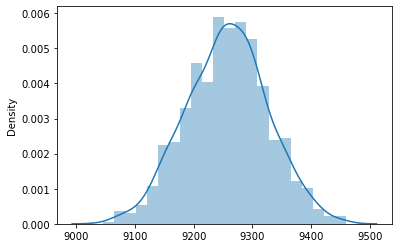

In [341]:
sns.distplot(sample_mean_10)

##### Married sample size 10000

In [355]:
samples = 10000
repetetion = 1000
sample_mean_11 = []
for rep in range(repetetion):
    x = df.loc[df['Marital_Status'] == 0]['Purchase'].sample(samples).mean()
    sample_mean_11.append(x)
np.mean(sample_mean_11)

9269.1311679

In [392]:
caluclate_ci(np.mean(sample_mean_11),np.std(sample_mean_11),10000)

We can be confident that 90% of customers will spend in range of 9268.317086338899,9269.9452494611
We can be confident that 95% of customers will spend in range of 9268.161129893311,9270.101205906687
We can be confident that 99% of customers will spend in range of 9267.856321859339,9270.40601394066


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

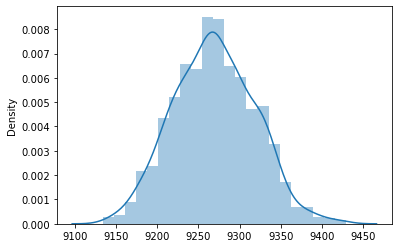

In [358]:
sns.distplot(sample_mean_11)

##### Un-Married sample size 10000

In [359]:
samples = 10000
repetetion = 1000
sample_mean_12 = []
for rep in range(repetetion):
    x = df.loc[df['Marital_Status'] == 1]['Purchase'].sample(samples).mean()
    sample_mean_12.append(x)
np.mean(sample_mean_12)

9259.2263345

In [393]:
caluclate_ci(np.mean(sample_mean_12),np.std(sample_mean_12),10000)

We can be confident that 90% of customers will spend in range of 9258.417822687972,9260.034846312026
We can be confident that 95% of customers will spend in range of 9258.26293325865,9260.189735741349
We can be confident that 99% of customers will spend in range of 9257.960210647498,9260.4924583525


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

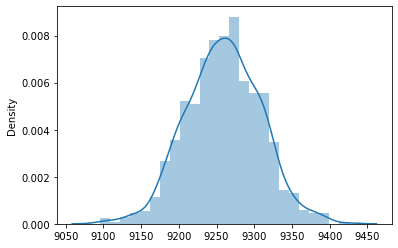

In [361]:
sns.distplot(sample_mean_12)

### Age Groups

<AxesSubplot:xlabel='Age', ylabel='Count'>

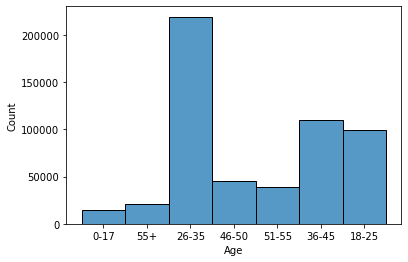

In [356]:
sns.histplot(x=df.Age)

In [363]:
#we can see that 26-35, 36-45, 18-25 are the top 3 age groups who are contribuiting.
#lets caluclate for these three age groups.

#### Age 26-35

In [365]:
samples = 10000
repetetion = 1000
sample_mean_13 = []
for rep in range(repetetion):
    x = df.loc[df['Age'] == '26-35']['Purchase'].sample(samples).mean()
    sample_mean_13.append(x)
np.mean(sample_mean_13)

9252.4704451

In [394]:
caluclate_ci(np.mean(sample_mean_12),np.std(sample_mean_12),10000)

We can be confident that 90% of customers will spend in range of 9258.417822687972,9260.034846312026
We can be confident that 95% of customers will spend in range of 9258.26293325865,9260.189735741349
We can be confident that 99% of customers will spend in range of 9257.960210647498,9260.4924583525


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

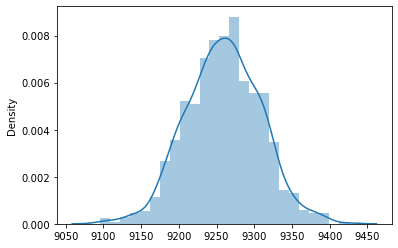

In [373]:
sns.distplot(sample_mean_12)

#### Population means and length

In [366]:
df.loc[df['Age'] == '26-35']['Purchase'].size

219587

In [369]:
df.loc[df['Age'] == '26-35']['Purchase'].mean()

9252.690632869888

In [367]:
df.loc[df['Age'] == '36-45']['Purchase'].size

110013

In [370]:
df.loc[df['Age'] == '36-45']['Purchase'].mean()

9331.350694917874

In [368]:
df.loc[df['Age'] == '18-25']['Purchase'].size

99660

In [371]:
df.loc[df['Age'] == '18-25']['Purchase'].mean()

9169.663606261289

#### Age 36-45

In [374]:
samples = 10000
repetetion = 1000
sample_mean_14 = []
for rep in range(repetetion):
    x = df.loc[df['Age'] == '36-45']['Purchase'].sample(samples).mean()
    sample_mean_14.append(x)
np.mean(sample_mean_14)

9333.7095372

In [399]:
caluclate_ci(np.mean(sample_mean_14),np.std(sample_mean_14),10000)

We can be confident that 90% of customers will spend in range of 9332.914177277638,9334.504897122362
We can be confident that 95% of customers will spend in range of 9332.761807401717,9334.657266998283
We can be confident that 99% of customers will spend in range of 9332.464009114887,9334.955065285114


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

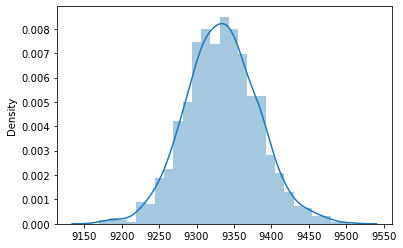

In [400]:
sns.distplot(sample_mean_14)

#### Age 18-25

In [378]:
samples = 10000
repetetion = 1000
sample_mean_15 = []
for rep in range(repetetion):
    x = df.loc[df['Age'] == '18-25']['Purchase'].sample(samples).mean()
    sample_mean_15.append(x)
np.mean(sample_mean_15)

9170.5956748

In [397]:
caluclate_ci(np.mean(sample_mean_15),np.std(sample_mean_15),10000)

We can be confident that 90% of customers will spend in range of 9169.792563016597,9171.398786583404
We can be confident that 95% of customers will spend in range of 9169.638708089604,9171.552641510398
We can be confident that 99% of customers will spend in range of 9169.338007354621,9171.85334224538


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

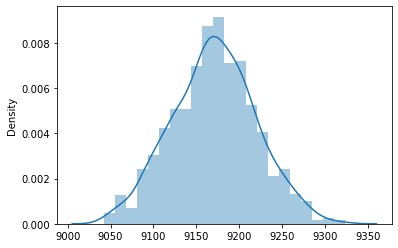

In [398]:
sns.distplot(sample_mean_15)

### Insights

#### Recommendations